In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci
from statsmodels.regression.linear_model import OLS

pd.set_option('float_format', '{:6.5f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")
from statsmodels.regression.linear_model import OLS

In [3]:
df=pd.read_csv('wifi.txt',sep='\t')

In [4]:
df.head()

,AP1,AP2,AP3,AP4,AP5,AP6,AP7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [5]:
X = df[['AP1','AP2','AP3','AP4','AP5','AP6','AP7']]
y = df['Room']

In [6]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify = y)

In [7]:
y_train = y_train.reset_index()
del y_train['index']
y_test = y_test.reset_index()
del y_test['index']

In [8]:
#2
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train_1)
X_train = pd.DataFrame(sc.transform(X_train_1))
X_test = pd.DataFrame(sc.transform(X_test_1))

In [9]:
sc = MinMaxScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X))

In [10]:
#3
from sklearn.linear_model import LogisticRegression

mlogit_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty = 'none')
mlogit_model.fit(X_train, y_train)
y_prediction = pd.DataFrame(mlogit_model.predict(X_test))

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
c_m = multilabel_confusion_matrix(y_true = y_test, y_pred = y_prediction, labels = [1,2,3,4]) # confusion matrix
c_m

array([[[373,   2],
        [  1, 124]],

       [[373,   2],
        [  6, 119]],

       [[369,   6],
        [  4, 121]],

       [[373,   2],
        [  1, 124]]])

In [12]:
rate = pd.DataFrame(columns=['room','false_pr','false_nr'])

for i in range(4): #here we calculate rates from the confusion matrix for each room False positive rate and False negative rate
    rate = rate.append({'room': i+1,'false_nr':c_m[i][1,0]/(c_m[i][1,0]+c_m[i][1,1]),
                       'false_pr':c_m[i][0,1]/(c_m[i][0,1]+c_m[i][0,0])},ignore_index=True)

rate

,room,false_pr,false_nr
0,1.00000,0.00533,0.00800
1,2.00000,0.00533,0.04800
2,3.00000,0.01600,0.03200
3,4.00000,0.00533,0.00800


We suppose that there is no difference in what way we mistake. In other words, we predict that it is 1 room but actually it is 2 room. The same when we predict it is 1 room but actually it is 3 room. So, we treat it as there is no difference in misclassification. For each room I computed false positive rate and false negative rate. False negative rate it is when we predict that this room is negative but actually it is positive, then we sum up all these missclassifications and divide it by all real positive rooms. In other words, we find an error of misclassification for real positive rooms. The same idea with false positive rate we find an error of misclassification for all real negative rooms, meaning we predict that it is positive but actually it is negative and divide it by all real negative rooms. Later, I do the same computation for different methods. There should be the same explanation.  

In [13]:
1 - mlogit_model.score(X_test, y_test)

0.02400000000000002

This score reflects all misclassified obeservations divided by all observations (test obsetvations). 

In [14]:
#4
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
res = lda.fit(X_train, y_train)

In [15]:
c_m_lda = multilabel_confusion_matrix(y_true = y_test, y_pred = res.predict(X_test), labels = [1,2,3,4])
c_m_lda

array([[[375,   0],
        [  3, 122]],

       [[375,   0],
        [ 13, 112]],

       [[356,  19],
        [  1, 124]],

       [[374,   1],
        [  3, 122]]])

In [16]:
rate_lda = pd.DataFrame(columns=['room','false_pr','false_nr'])

for i in range(4):
    rate_lda = rate_lda.append({'room': i+1,'false_nr':c_m_lda[i][1,0]/(c_m_lda[i][1,0]+c_m_lda[i][1,1]),
                       'false_pr':c_m_lda[i][0,1]/(c_m_lda[i][0,1]+c_m_lda[i][0,0])},ignore_index=True)

rate_lda

,room,false_pr,false_nr
0,1.00000,0.00000,0.02400
1,2.00000,0.00000,0.10400
2,3.00000,0.05067,0.00800
3,4.00000,0.00267,0.02400


In [17]:
1 - res.score(X_test,y_test)

0.040000000000000036

In [18]:
#5
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
res_qda = qda.fit(X_train, y_train)

In [19]:
c_m_qda = multilabel_confusion_matrix(y_true = y_test, y_pred = res_qda.predict(X_test), labels = [1,2,3,4])
c_m_qda

array([[[374,   1],
        [  0, 125]],

       [[371,   4],
        [  5, 120]],

       [[370,   5],
        [  6, 119]],

       [[373,   2],
        [  1, 124]]])

In [20]:
rate_qda = pd.DataFrame(columns=['room','false_pr','false_nr'])

for i in range(4):
    rate_qda = rate_qda.append({'room': i+1,'false_nr':c_m_qda[i][1,0]/(c_m_qda[i][1,0]+c_m_qda[i][1,1]),
                       'false_pr':c_m_qda[i][0,1]/(c_m_qda[i][0,1]+c_m_qda[i][0,0])},ignore_index=True)

rate_qda

,room,false_pr,false_nr
0,1.00000,0.00267,0.00000
1,2.00000,0.01067,0.04000
2,3.00000,0.01333,0.04800
3,4.00000,0.00533,0.00800


In [21]:
1 - res_qda.score(X_test,y_test)

0.02400000000000002

We can see that the error rate is less for qda than lda. I might assume that this difference appears due to the real separation curve between groups which is probably not a line. That is why qda method performs better than lda because of its more flexibility. 

In [22]:
#6
from sklearn.neighbors import KNeighborsClassifier

rate_knn = pd.DataFrame(columns=['k','room','false_pr','false_nr'])
score_knn = pd.DataFrame(columns=['k','score'])

for j in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=j, metric = 'mahalanobis', metric_params={'V': np.cov(X_train.T)})                                                                       
    knn.fit(X_train, y_train)

    c_m_knn = multilabel_confusion_matrix(y_true = y_test, y_pred = knn.predict(X_test), labels = [1,2,3,4]) # confusion matrix
    
    for i in range(4):  # here we calculate rates from the confusion matrix for each K neighbors
        rate_knn = rate_knn.append({'k': j, 'room': i+1,'false_nr':c_m_knn[i][1,0]/(c_m_knn[i][1,0]+c_m_knn[i][1,1]),
                       'false_pr':c_m_knn[i][0,1]/(c_m_knn[i][0,1]+c_m_knn[i][0,0])},ignore_index=True)
        
    score_knn = score_knn.append({'k': j,'score': 1 - knn.score(X_test,y_test)},ignore_index=True)
    

In [23]:
rate_knn

,k,room,false_pr,false_nr
0,1.00000,1.00000,0.00267,0.03200
1,1.00000,2.00000,0.02133,0.06400
2,1.00000,3.00000,0.03733,0.07200
3,1.00000,4.00000,0.00267,0.02400
4,2.00000,1.00000,0.01067,0.01600
...,...,...,...,...
75,19.00000,4.00000,0.00267,0.03200
76,20.00000,1.00000,0.00267,0.01600
77,20.00000,2.00000,0.01333,0.08800
78,20.00000,3.00000,0.04533,0.05600


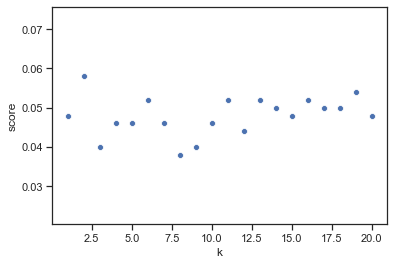

In [24]:
sns.scatterplot(x = score_knn.k, y = score_knn.score)
plt.show()

min error rate when k = 8 

In [33]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
error_rate = pd.DataFrame(columns = ['k','score'])

for k in range(1,16):
    y_pred = pd.DataFrame(columns = ['score'])
    
    for train_index,test_index in loo.split(X):          # using LOO method requires to grab one observation
                                                         # that is why we separate in group, test index it is just for one observation 
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]    # from the whole group and the others are for training the model              
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]    # here we make y for test and train
        knn_model = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', 
                                        metric_params = {'V':np.cov(X_trn)}, algorithm = 'brute')
        knn_model_fit = knn_model.fit(X_trn,y_trn)
        
        # so for one observation we may get 1 or 0 score, we collect all these 1 and 0 save them into y_pred. Further, we have a list
        # with these 1 or 0 to compute an error rate for the model we should sum up the list and divide it by the quantity number in the list
        # therefore we will get an accuracy score
        
        y_pred = y_pred.append({'score': knn_model_fit.score(X_tst,y_tst)}, ignore_index = True)  
        
    error_rate = error_rate.append({'k': k, 'score': float(1 - y_pred.sum()/y_pred.count())}, ignore_index = True)


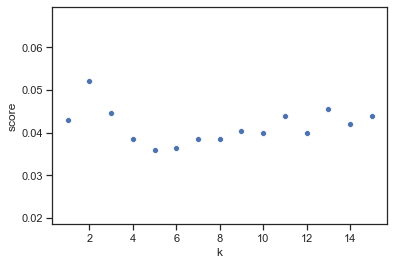

In [34]:
sns.scatterplot(x = error_rate.k, y = error_rate.score)
plt.show()

k = 5 best model with Mahalanobis

In [45]:
from sklearn.model_selection import cross_validate

error_rate_6 = pd.DataFrame(columns = ['k','score'])

for k in range(1,16):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    
    cross_val = cross_validate(knn_model, X, y, cv = loo, scoring = 'accuracy')
    
    error_rate_6 = error_rate_6.append({'k': k,'score': np.mean(cross_val['test_score'])}, ignore_index = True)
    
    

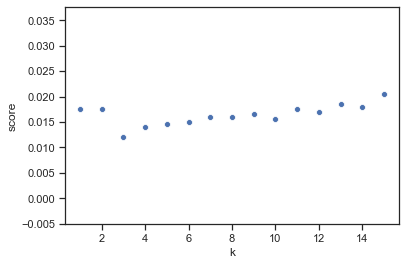

In [50]:
sns.scatterplot(x = error_rate_6.k, y = 1 - error_rate_6.score)
plt.show()

In [53]:
1 - error_rate_6.score[2]

0.01200000000000001

k = 3 best model without using Mahalanobis

In [56]:
# KNN K=3 for the test observations to compare the models

knn = KNeighborsClassifier(n_neighbors=3)                                                                       
knn.fit(X_train, y_train)
1 - knn.score(X_test,y_test)

0.010000000000000009

Each method has some advantages over the others in a particular situation. Let's start by considering linear methods such as LDA and Logit. Using these methods we should assume that there is a separation curve between linear classes. However, in reality, it is hard to see such relationships between classes, usually, they are more complicated. Additionally, both methods are quite equal except for some situations. LDA assumes a distribution from which a sample was drawn, it should be normal. In such situations, LDA performs better than Logit when there is a linear border and vice versa. QDA method is more flexible than the previous ones and has advantages over them when the border is more complicated than a linear one. It assumes that the boundary should be quadratic. Therefore, it can produce a wider range of decision boundaries. However, it has a drawback when there is no normality the result is bad for prediction. KNN method can be more flexible than others relative to the number of the nearest neighbors. KNN method might outperform QDA when there is a more complicated decision boundary than a quadratic one. There are no assumptions about normality and so on. However, it suffers from dimensionality problem but in this case, we have enough observations and not a lot of regressors. We see that the error rate for KNN method is practically twice and half as large as QDA rate. I prefer KNN method in this case because the result is quite good, and it is more universal practically in each situation this method performs considerably well because we may choose the level of flexibility. That is why it can draw any boundary shape. 

In [27]:
#7
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pd.DataFrame(pca.fit_transform(X))

In [28]:
# MULTI LOGIT

mlogit_pca = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty = 'none')
mlogit_mpca = mlogit_pca.fit(X_PCA, y)


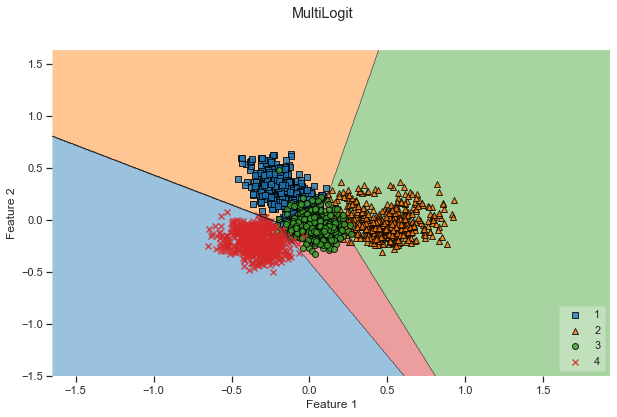

In [29]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(X_PCA),np.array(y), clf=mlogit_mpca,legend=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.suptitle('MultiLogit')
plt.show()

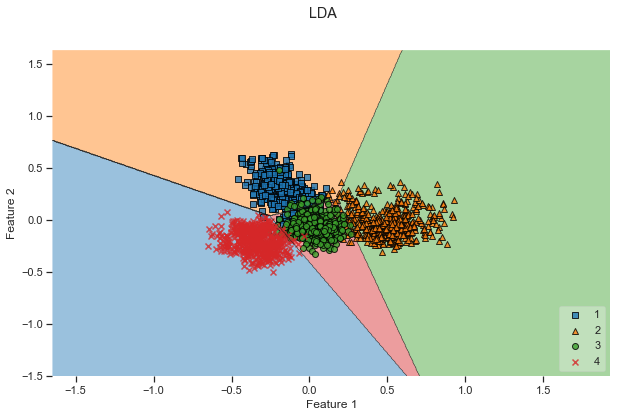

In [30]:
#linear discriminant analysis

plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(X_PCA),np.array(y), clf=lda.fit(X_PCA, y),legend=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.suptitle('LDA')
plt.show()


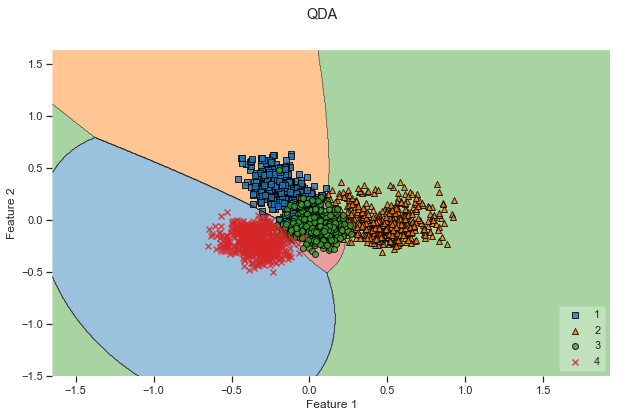

In [31]:
#QDA 

plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(X_PCA),np.array(y), clf=qda.fit(X_PCA, y),legend=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.suptitle('QDA')
plt.show()

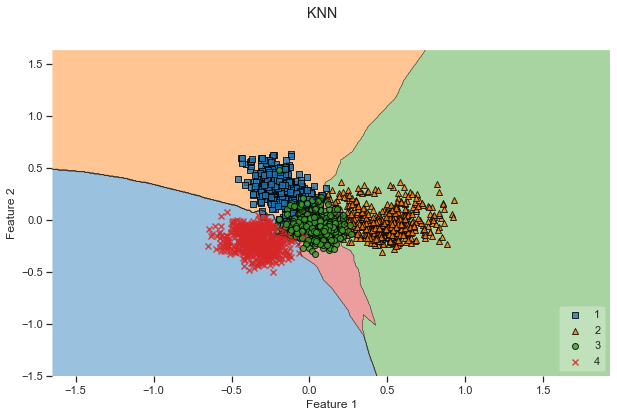

In [49]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'mahalanobis', 
                                        metric_params = {'V':np.cov(X_train)}, algorithm = 'brute')

plt.figure(figsize = (10, 6))
plot_decision_regions(np.array(X_PCA),np.array(y), clf=knn.fit(X_PCA, y),legend=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.suptitle('KNN')
plt.show()